# Load Data

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_gen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.15,
        rescale=1./255,
        horizontal_flip=True,
        validation_split=0.2)

In [3]:
#train: 80% of "Validation"
train_dir = "C:/Users/zhuyi/Documents/ANLY590_DEEP/project/Validation"
train = data_gen.flow_from_directory(directory=train_dir,target_size=(160,160),
                                          class_mode="categorical",
                                          batch_size=32,subset = "training")

Found 640 images belonging to 2 classes.


In [4]:
#valid: 20% of "Validation"
valid = data_gen.flow_from_directory(directory=train_dir,target_size=(160,160),
                                          class_mode="categorical",
                                          batch_size=32,subset="validation")

Found 160 images belonging to 2 classes.


In [5]:
#test: "sample_training"
test_dir = "C:/Users/zhuyi/Documents/ANLY590_DEEP/project/sample_training"
test = data_gen.flow_from_directory(directory=test_dir,target_size=(160,160),
                                          class_mode="categorical",
                                          batch_size=32)

Found 96 images belonging to 2 classes.


# CNN with 1 Convolutional Layer

In [6]:
model_one_layer = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(160, 160, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_one_layer.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [7]:
checkpoint = ModelCheckpoint("CNN_one_checkpoint.h5",monitor="val_accuracy",save_best_only=True,verbose=1)

In [8]:
history_one_layer = model_one_layer.fit_generator(generator=train, 
                              validation_data=valid,
                              callbacks=[checkpoint],
                              epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 2.3515 - accuracy: 0.6703
Epoch 00001: val_accuracy improved from -inf to 0.86250, saving model to CNN_one_checkpoint.h5
20/20 [==============================] - 25s 1s/step - loss: 2.3515 - accuracy: 0.6703 - val_loss: 0.4222 - val_accuracy: 0.8625
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.2945 - accuracy: 0.8953
Epoch 00002: val_accuracy improved from 0.86250 to 0.94375, saving model to CNN_one_checkpoint.h5
20/20 [==============================] - 26s 1s/step - loss: 0.2945 - accuracy: 0.8953 - val_loss: 0.1887 - val_accuracy: 0.9438
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.1720 - accuracy: 0.9438
Epoch 00003: val_accuracy did not improve from 0.94375
20/20 [==============================] - 25s 1s/step - loss: 0.1720 - accuracy: 0.9438 - val_loss: 0.2034 - val_accuracy: 0.9250
Epoch 4

### Evaluation: 1 layer

In [9]:
model_one_layer.evaluate(train)

20/20 [==============================] - 8s 385ms/step - loss: 0.1596 - accuracy: 0.9609


[0.1595587134361267, 0.9609375]

In [10]:
model_one_layer.evaluate(test)

3/3 [==============================] - 1s 281ms/step - loss: 0.1833 - accuracy: 0.9167


[0.1832735389471054, 0.9166666865348816]

In [11]:
model_one_layer.evaluate(valid)

5/5 [==============================] - 2s 302ms/step - loss: 0.1721 - accuracy: 0.9500


[0.17210420966148376, 0.949999988079071]

In [12]:
df_loss_accuary = pd.DataFrame.from_dict(history_one_layer.history).drop(columns = ['val_loss', 'val_accuracy'])
df_loss_accuary

,loss,accuracy
0,2.351504,0.670313
1,0.294478,0.895312
2,0.171974,0.943750
3,0.174695,0.942187
4,0.169195,0.939062
5,0.161781,0.940625
6,0.115993,0.962500
7,0.127954,0.950000
8,0.107550,0.964063
9,0.114061,0.965625


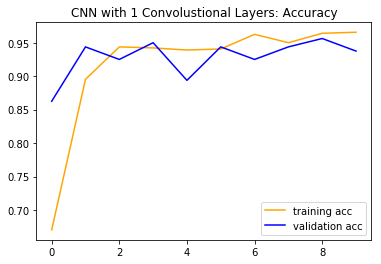

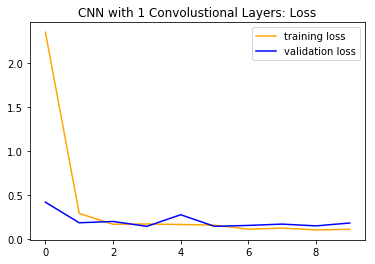

In [13]:
acc = history_one_layer.history['accuracy']
val_acc = history_one_layer.history['val_accuracy']
loss = history_one_layer.history['loss']
val_loss = history_one_layer.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('CNN with 1 Convolustional Layers: Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('CNN with 1 Convolustional Layers: Loss')
plt.legend()
plt.show()

In [14]:
model_one_layer.save(os.path.join("C:/Users/zhuyi/Documents/ANLY590_DEEP/project",'CNN_one_layer.h5'))

# CNN with 4 Convolutional Layers

In [15]:
model_four_layer = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(160, 160, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_four_layer.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [16]:
checkpoint = ModelCheckpoint("CNN_four_checkpoint.h5",monitor="val_accuracy",save_best_only=True,verbose=1)

In [18]:
history_four_layer = model_four_layer.fit_generator(generator=train, 
                              validation_data=valid,
                              callbacks=[checkpoint],
                              epochs=10)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.2067 - accuracy: 0.9266
Epoch 00001: val_accuracy improved from 0.93750 to 0.96250, saving model to CNN_four_checkpoint.h5
20/20 [==============================] - 45s 2s/step - loss: 0.2067 - accuracy: 0.9266 - val_loss: 0.1265 - val_accuracy: 0.9625
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.1403 - accuracy: 0.9547
Epoch 00002: val_accuracy did not improve from 0.96250
20/20 [==============================] - 42s 2s/step - loss: 0.1403 - accuracy: 0.9547 - val_loss: 0.1567 - val_accuracy: 0.9500
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.1261 - accuracy: 0.9625
Epoch 00003: val_accuracy did not improve from 0.96250
20/20 [==============================] - 42s 2s/step - loss: 0.1261 - accuracy: 0.9625 - val_loss: 0.1801 - val_accuracy: 0.9563
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.1359 - accuracy: 0.9578
Epoch 00004: val_accuracy di

### Evaluation: 4 layer

In [19]:
model_four_layer.evaluate(train)

20/20 [==============================] - 12s 604ms/step - loss: 0.0934 - accuracy: 0.9734


[0.09342844784259796, 0.973437488079071]

In [20]:
model_four_layer.evaluate(test)

3/3 [==============================] - 1s 397ms/step - loss: 0.0845 - accuracy: 0.9792


[0.08445430546998978, 0.9791666865348816]

In [21]:
model_four_layer.evaluate(valid)

5/5 [==============================] - 2s 492ms/step - loss: 0.1774 - accuracy: 0.9438


[0.1773635298013687, 0.9437500238418579]

In [22]:
df_loss_accuary = pd.DataFrame.from_dict(history_four_layer.history).drop(columns = ['val_loss', 'val_accuracy'])
df_loss_accuary

,loss,accuracy
0,0.206666,0.926562
1,0.140347,0.954687
2,0.126056,0.962500
3,0.135931,0.957812
4,0.142516,0.943750
5,0.141692,0.950000
6,0.148135,0.951563
7,0.121283,0.962500
8,0.121004,0.965625
9,0.180465,0.945312


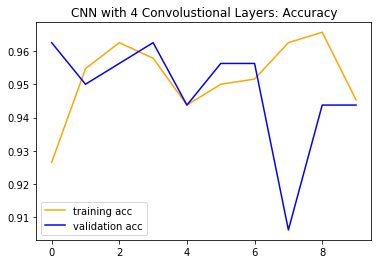

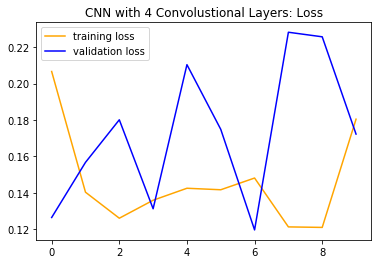

In [23]:
acc = history_four_layer.history['accuracy']
val_acc = history_four_layer.history['val_accuracy']
loss = history_four_layer.history['loss']
val_loss = history_four_layer.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('CNN with 4 Convolustional Layers: Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('CNN with 4 Convolustional Layers: Loss')
plt.legend()
plt.show()

In [24]:
model_four_layer.save(os.path.join("C:/Users/zhuyi/Documents/ANLY590_DEEP/project",'CNN_four_layer.h5'))